In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from src import data_loader
from src.customizable_CNN import FlexibleCNN
from src.utils import train_evaluate_model, evaluate_model

## Use the torch MNIST Dataset
## https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

### load data

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,)) ])

In [3]:
train_loader, val_loader, test_loader = data_loader.create_datasets(transform, train_size=0.8, batch_size=64)

## train model

In [6]:
input_channels = 1
conv_params = [(16, 3, 1), (32, 3, 1)]  # List of tuples: (out_channels, kernel_size, padding)
fc_params = [64, 10]  # List of number of neurons for each fully connected layer

model = FlexibleCNN(input_channels, conv_params, fc_params)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.1)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [7]:
train_losses, val_losses = train_evaluate_model (train_loader, val_loader, model, criterion, optimizer, 3, 1)

Epoch 1/3, Train Loss: 0.33601876442010203
Epoch 1/3, Val Loss: 0.08468611288241092
Epoch 2/3, Train Loss: 0.06690014204848557
Epoch 2/3, Val Loss: 0.058047065476668956
Epoch 3/3, Train Loss: 0.04808961656456813
Epoch 3/3, Val Loss: 0.05990862788166851


## evaluate

In [8]:
loss, true_values, predictions = evaluate_model(test_loader, model, criterion)

correct = (true_values == predictions).sum().item()
total = len(true_values)
accuracy = correct / total
print(accuracy)

0.9849


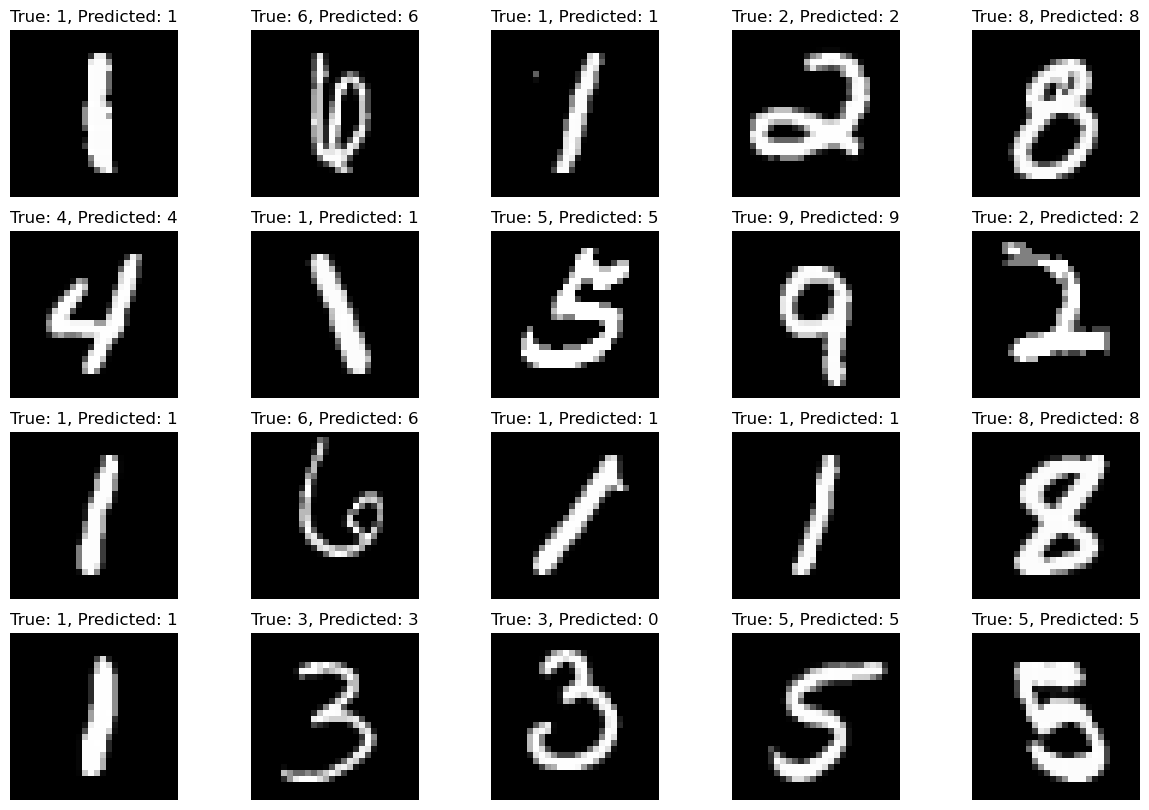

In [41]:
indices = np.random.choice(len(test_loader.dataset), size=20, replace=False)
    
plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    image, target = test_loader.dataset[idx]
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)
    plt.subplot(4, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {target}, Predicted: {predicted[0]}")
plt.show()